In [34]:
#importing libraries
import pandas as pd #for data analysis and manipulation
import numpy as np #for numerical operations and mathematical functions
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns #for statistical graphics


#print to check importing of libraries
print("successfully imported")

successfully imported


In [35]:
#loading the dataset

In [36]:
df=pd.read_csv('Loan_Data.csv')
print("loading successfully")

loading successfully


In [37]:
#Data Cleaning


In [38]:
# Check for missing values
null_counts = df.isnull().sum()

#Display the number of null values
print(null_counts)

#print the number of null values
print("total null values in the dataset-",null_counts.sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
total null values in the dataset- 149


In [39]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values
# [0] This ensures that if there are multiple mode values, only the first one is selected.
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# The best way fill in the Loan Amount is the Mean (The average).
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

# The best way fill in the Credit History is the mode (Most common valus)
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


# Fill the missing values for categorical data.
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])



In [40]:
# Checking for missing values after handling
null_counts = df.isnull().sum()

# Display the number of null values after handling
print(null_counts)

#print the number of null values
print("total null values in the dataset-",null_counts.sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
total null values in the dataset- 0


In [41]:
#dataset info

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [43]:
#shape of the dataset
df.shape

(614, 13)

In [44]:
#dataset dimensions and statistics
num_rows,num_cols=df.shape
num_features=num_cols-1
num_data=num_rows*num_cols

#print the info
print("number of rows-",num_rows)
print("number of cols-",num_cols)
print("number of features-",num_features)
print("number of all data-",num_data)

number of rows- 614
number of cols- 13
number of features- 12
number of all data- 7982


In [45]:
#dataset basic info like - column_names,data_types,non-null values counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [46]:
#descriptive statistics of numeric variables 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Standard Deviation (std)= A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data. min = The smallest value. 25% = It represents the value below which 25% of the data fall 50% = It represents the value below which 50% of the data fall 75% = It represents the value below which 75% of the data fall max = The largest value.

In [47]:
#descriptive analysis of categorical variables only
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [48]:

#Exploratory Data Analysis(EDA) - data visualisation data cleaning data preprocessing



Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

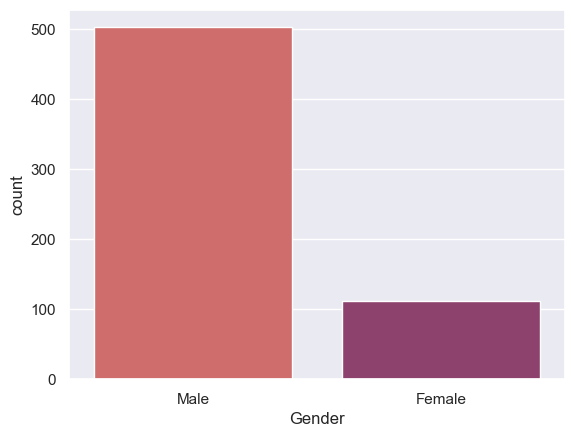

In [49]:
#data visualisation
GenderAnalysis=df.Gender.value_counts(dropna=False)#dropna - as false to count NaN(Not-a-Number) values
print(GenderAnalysis)
#bar chart analysis for gender feature
sns.countplot(x="Gender",data=df,palette='flare')

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

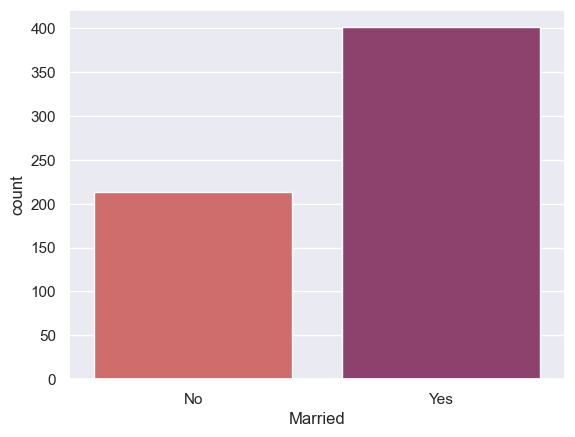

In [50]:
MarriedAnalysis=df.Married.value_counts(dropna=False)
print(MarriedAnalysis)

sns.countplot(x="Married",data=df,palette='flare')

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


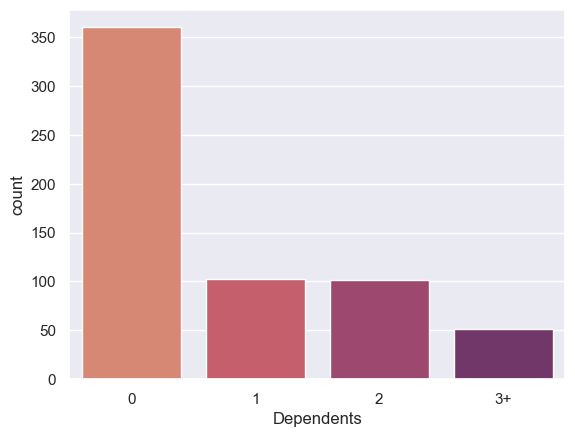

In [51]:
DependentsAnalysis = df.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

#bar chart analysis for DependentAnalysis
sns.countplot(x="Dependents", data=df, palette="flare")
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


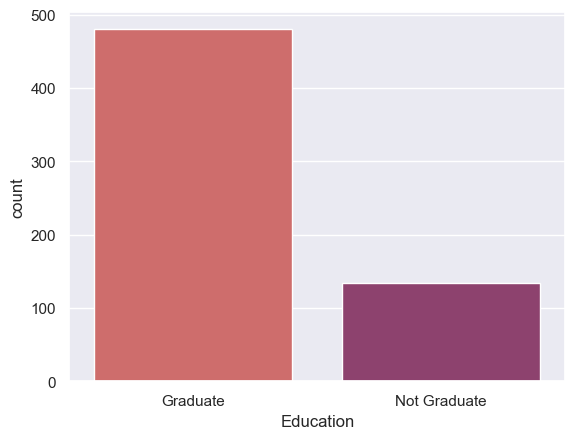

In [52]:
EducationAnalysis = df.Education.value_counts(dropna=False)
print(EducationAnalysis)

#bar chart analysis for EducationAnalysis
sns.countplot(x="Education", data=df, palette="flare")
plt.show()

The Average Income:  5403.459283387622
Number of people income above the average: 176
Number of people income below the average:  438


C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


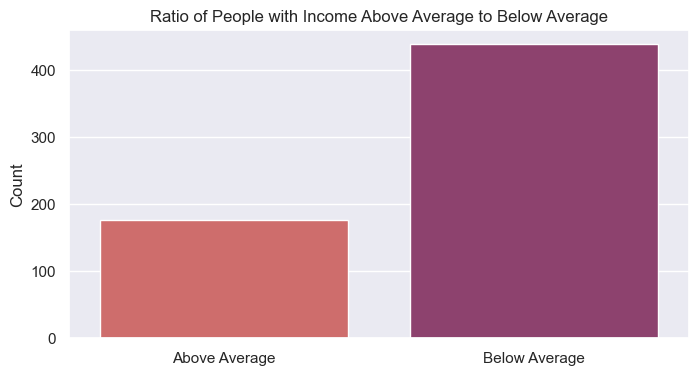

In [53]:
#calculate average income
average_income = df['ApplicantIncome'].mean()
print("The Average Income: ",average_income)


# Count incomes higher and lower than average,counts boolean values
above_average_count = (df['ApplicantIncome'] > average_income).sum()
below_average_count = (df['ApplicantIncome'] <= average_income).sum()



print("Number of people income above the average:",above_average_count)
print("Number of people income below the average: ",below_average_count)


# Ratio plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()


Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


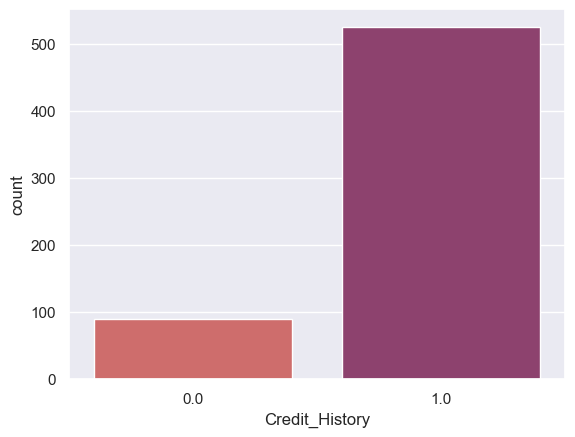

In [54]:
Credit_HistoryAnalysis = df.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

#Bar Charts Analysis for Credit_HistoryAnalysis
sns.countplot(x="Credit_History", data=df, palette="flare")
plt.show()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


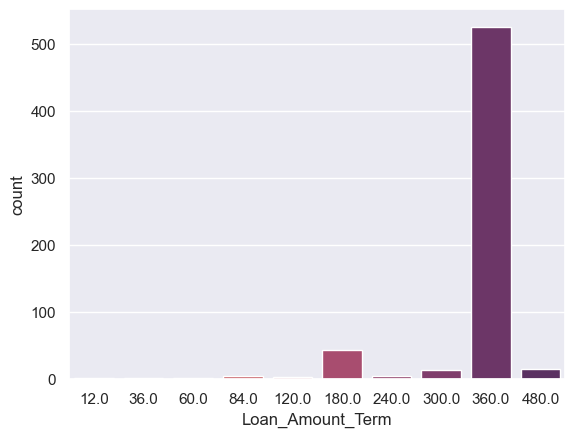

In [55]:
Loan_Amount_TermAnalysis = df.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

#Bar Charts Analysis for Loan_Amount_TermAnalysis
sns.countplot(x="Loan_Amount_Term", data=df, palette="flare")
plt.show()


C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


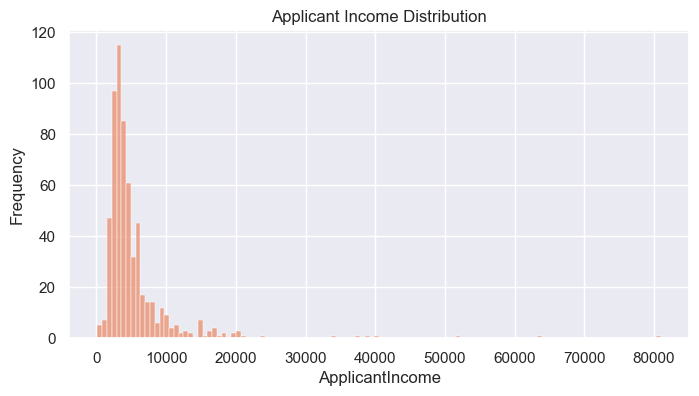

C:\Users\missv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


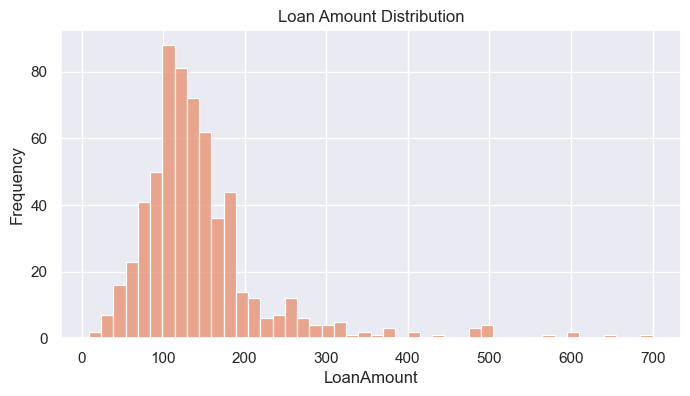

In [57]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# Set the seaborn theme palette
sns.set_theme(palette="flare")
#create a function for plot distribution 
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")

plot_distribution("LoanAmount", "Loan Amount Distribution")


Data Relationships Analysis

Text(0, 0.5, 'Count')

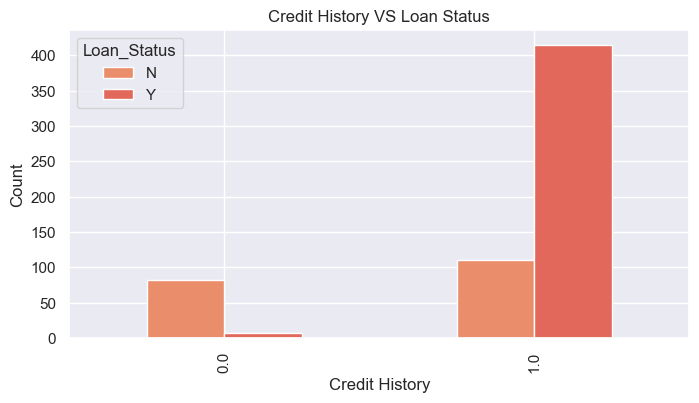

In [59]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(df.Credit_History, df.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')



Strong credit history is a key determinant in loan approval.The data clearly shows a significantly higher approval rate for applicants with good credit compared to those with poor credit.








Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

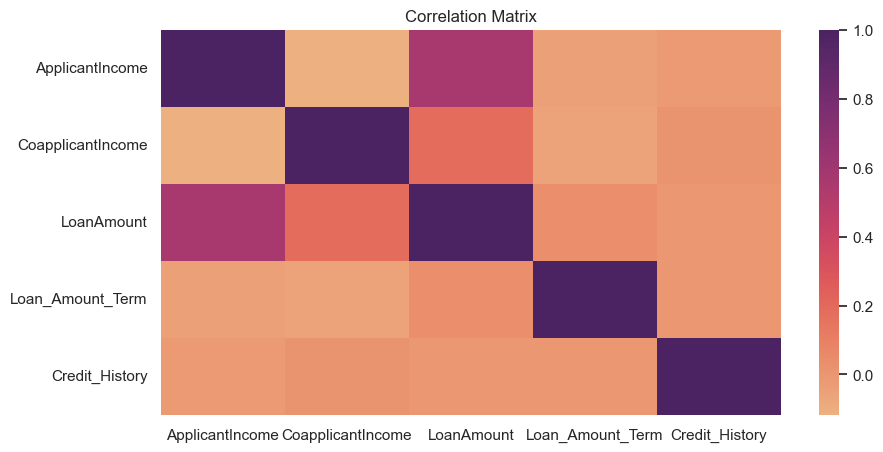

In [58]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(10, 5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, cmap='flare') # annot - write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')


This shows positive correlation between Loan Amount and Applicant Income